# Berstein polynomials
In this notebook we show the computation and application of Berstein polynomials, which provide a way to interpolate any $C^0$ function. Berstein polynomial, however, are a theoretical tool which converges extremely slowly. 

Berstein polynomials show that the fact that Lagrange interpolation does not converge for $C^0$ functions in general is not due to the fact that polynomial interpolation cannot interpolate continuous functions, but to the choice of the "wrong" polynomial basis.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

We employ the utility function `np.vander` in order to compute Berstein polynomials:

In [91]:
def berstein_polynomials(n):
    def fnc(x):
        xs = np.vander(x, n+1, increasing=True)
        one_minus_x = np.vander(1-x, n+1)
        return comb(n, list(range(n+1))) * np.multiply(xs, one_minus_x)
    return fnc
    
def berstein_interpolation(f,n):
    def fnc(x):
        return berstein_polynomials(n)(x).dot(f(np.linspace(0,1,n+1)))
    return fnc

What happens? (Since Berstein works only in $[0,1]$ we change the x-scale of $\sin$ in order to see something interesting:

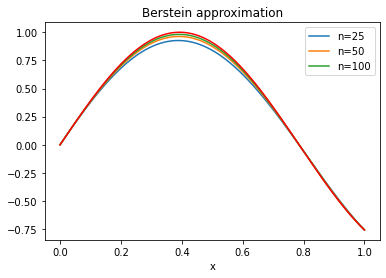

In [102]:
def sin2(x):
    return np.sin(x*4)
f = sin2

ns = [25,50,100]

x = np.linspace(a,b,1000)
for n in ns:
    plt.plot(x, berstein_interpolation(f,n)(x), label='n={}'.format(n))
plt.legend()
plt.plot(x, f(x), color='red');

plt.xlabel('x')
plt.title('Berstein approximation')
plt.show()

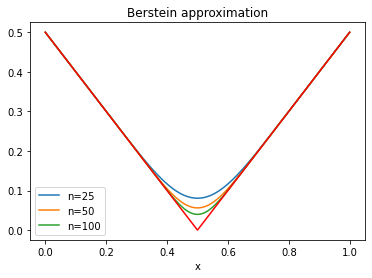

In [103]:
def abs2(x):
    return np.abs(x-0.5)
f = abs2

ns = [25,50,100]

x = np.linspace(a,b,1000)
for n in ns:
    plt.plot(x, berstein_interpolation(f,n)(x), label='n={}'.format(n))
plt.legend()
plt.plot(x, f(x), color='red');

plt.xlabel('x')
plt.title('Berstein approximation')
plt.show()